intrinsic matrix: [[  1.15777829e+03   0.00000000e+00   6.67113866e+02]
 [  0.00000000e+00   1.15282230e+03   3.86124658e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]  distortion coeffs: [[-0.24688572 -0.02372824 -0.00109832  0.00035104 -0.00260433]]


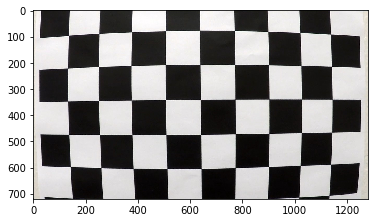

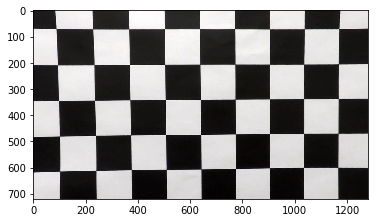

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg

# camera calibration 

nx = 9
ny = 6

# 1. load images and extract chessboard corners 
imgpoints = []
objpoints = []
gray = []
img = []
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

for i in range(1, 21):
    fname = './camera_cal/calibration' + str(i) + '.jpg'
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # find check board corners 
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    if ret == True:
        # print('corners.shape: {}'.format(corners.shape))
        # img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        # plt.imshow(img)
        # plt.show()
        imgpoints.append(corners)
        objpoints.append(objp)
    # else:
        # print('ret = {} corners: {}'.format(ret, corners))
        # plt.imshow(img)
        # plt.show()
    
# 2. calibration 
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# 3. undistort the first image 
img = mpimg.imread('./camera_cal/calibration1.jpg')
undist = cv2.undistort(img, mtx, dist, None, mtx)

# 4. show the result 
# print the calibration result 
print('intrinsic matrix: {}'.format(mtx), ' distortion coeffs: {}'.format(dist))

# plot with various axes scales
# plt.figure(1)

# two columns, left: raw image, right: undistorted image 
# plt.subplot(121)
plt.imshow(img)
plt.show()

# plt.subplot(122)
plt.imshow(undist)
plt.show()




